In [447]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [448]:
game_csv = pd.read_csv('Training_Dataset.csv',na_values="NA")
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('Data_Dictionary.csv',na_values="NA")

In [449]:
gameDf.shape

(40000, 52)

In [450]:
np.sum(gameDf[dic['Income. 0 = No data available']]==0)

1605

In [451]:
dataDict.values[:,0]


array(['cm_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19',
       'mvar20', 'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25',
       'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30', 'mvar31',
       'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37',
       'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47', 'mvar48', 'mvar49',
       'mvar50', 'mvar51'], dtype=object)

In [452]:
dic = dict(zip(dataDict.values[:,1], dataDict.values[:,0]))

In [453]:
print('gameDf shape:',gameDf.shape)
print('dataDict shape', dataDict.shape)

gameDf shape: (40000, 52)
dataDict shape (52, 2)


In [454]:
dataDict.iloc[1,0]

'mvar1'

In [455]:
del gameDf[dic['Unique customer identifier']]

In [456]:
len(gameDf.keys())

51

In [457]:
dic['Customer spending capacity. 0 = No data available']

'mvar3'

In [458]:
dic['Income. 0 = No data available']

'mvar9'

In [459]:
features=list(dic.keys())
features.remove('Unique customer identifier')
features.remove('Card product type')
features.remove('Industry code in which the customer has spent the most in past. (Including estimated external).')
features

['Family Size',
 'Customer spending capacity. 0 = No data available',
 'Number of total cards (including estimated external) active in the last yaer',
 'Number of months the Account has been set up.',
 'Total club memberhship fees in the last one year',
 'Internal score for affinity towards high spend',
 'Internal influencer score',
 'Income. 0 = No data available',
 'Platinum card indicator',
 'Internal probability score for affinity towards busniess expenditure',
 'Number of times the customer has made payments against the card in the last 1 year',
 'Number of club memberships',
 'Number of air miles memberships',
 'Electronics related spend in quarter 1',
 'Electronics related spend in quarter 2',
 'Electronics related spend in quarter 3',
 'Electronics related spend in quarter 4',
 'Travel related spend in quarter 1',
 'Travel related spend in quarter 2',
 'Travel related spend in quarter 3',
 'Travel related spend in quarter 4',
 'Household spend in quarter 1',
 'Household spend i

In [460]:
gameDfBase=gameDf

In [461]:
gameDfBaseTemp = gameDfBase[gameDfBase.mvar9!=0]
#gameDfBaseTemp = gameDfBaseTemp[gameDfBaseTemp.mvar9!=0]


In [462]:
gameDfBaseTemp.shape

(38395, 51)

In [463]:
gameDfBaseTemp.groupby('mvar12')['mvar9'].describe()

,count,mean,std,min,25%,50%,75%,max
mvar12,,,,,,,,
Apparel,369.0,1.227930e+06,1.565293e+06,18731.0,110976.00,285228.0,2918974.0,9376031.0
Automotive,504.0,4.453349e+06,7.944844e+06,38383.0,328233.00,2468209.0,2918974.0,34207020.0
Construction,3163.0,1.919864e+06,3.584096e+06,2093.0,157787.00,689301.0,2918974.0,34207020.0
Consumables,1122.0,2.021097e+06,4.641765e+06,15606.0,179426.00,490359.5,2918974.0,34207020.0
Durable goods,1647.0,3.896549e+06,6.844847e+06,11884.0,390937.50,1901520.0,2918974.0,34207020.0
Entertainment,2338.0,1.167293e+06,2.046782e+06,1584.0,81415.75,255915.0,2918974.0,34207020.0
Finance,2719.0,1.860044e+06,4.016862e+06,9914.0,143516.50,435765.0,2918974.0,34207020.0
Household,2308.0,1.669792e+06,3.377517e+06,2863.0,136811.25,499149.0,2918974.0,34207020.0
Manufacturing,1772.0,4.001208e+06,6.806952e+06,2730.0,364068.75,2376900.0,3098900.5,34207020.0


In [464]:
gameDfBaseTemp.groupby('mvar12')['mvar9'].describe().iloc[1,5]

2468209.0

In [465]:
indCode=np.sort(gameDfBaseTemp['mvar12'].unique())
indCode

array(['Apparel', 'Automotive         ', 'Construction       ',
       'Consumables        ', 'Durable goods      ', 'Entertainment      ',
       'Finance            ', 'Household          ', 'Manufacturing      ',
       'Mining             ', 'Misc services      ', 'Non durable goods  ',
       'Office supplies    ', 'Personal services  ', 'Produce            ',
       'Social services    ', 'Transport          ', 'Unknown            '], dtype=object)

In [466]:
medianIncomes=dict(zip(indCode,gameDfBaseTemp.groupby('mvar12')['mvar9'].describe().iloc[:,5]))
medianIncomes

{'Apparel': 285228.0,
 'Automotive         ': 2468209.0,
 'Construction       ': 689301.0,
 'Consumables        ': 490359.5,
 'Durable goods      ': 1901520.0,
 'Entertainment      ': 255915.0,
 'Finance            ': 435765.0,
 'Household          ': 499149.0,
 'Manufacturing      ': 2376900.0,
 'Mining             ': 1086603.0,
 'Misc services      ': 208925.0,
 'Non durable goods  ': 1841364.0,
 'Office supplies    ': 1267680.0,
 'Personal services  ': 349397.0,
 'Produce            ': 360569.0,
 'Social services    ': 348612.0,
 'Transport          ': 633840.0,
 'Unknown            ': 2918974.0}

In [467]:
gameDfBase.mvar9

0          337236
1         2918974
2          498656
3         2480074
4         2918974
5           48246
6         2918974
7         2259153
8           72102
9         2521045
10         950760
11         809798
12              0
13        8200323
14        1188450
15         637761
16          87153
17         182229
18        2918974
19         110922
20        7344340
21        9981039
22          51499
23         427842
24        2999877
25        2918974
26        2918974
27         594225
28         475380
29        2918974
           ...   
39970     2918974
39971      154968
39972     1354833
39973      115793
39974     2918974
39975      792300
39976      175042
39977       79230
39978      117150
39979      106083
39980      110922
39981       34068
39982     2918974
39983     2918974
39984     2918974
39985      285228
39986    27229889
39987      271979
39988    14421889
39989     2918974
39990       60610
39991      126768
39992       78437
39993       77255
39994     

In [468]:
gameDfBase.mvar12

0        Office supplies    
1        Unknown            
2        Misc services      
3        Social services    
4        Unknown            
5        Manufacturing      
6        Social services    
7        Office supplies    
8        Entertainment      
9        Construction       
10                   Apparel
11       Construction       
12       Office supplies    
13       Misc services      
14       Social services    
15       Misc services      
16       Manufacturing      
17       Finance            
18       Social services    
19       Entertainment      
20       Construction       
21       Automotive         
22       Misc services      
23       Misc services      
24       Social services    
25       Personal services  
26       Automotive         
27       Consumables        
28       Household          
29       Misc services      
                ...         
39970    Office supplies    
39971    Transport          
39972    Durable goods      
39973    Finan

In [469]:
np.sum(gameDfBase.mvar9==0)
gameDfBase.mvar12[0]

'Office supplies    '

In [470]:
#imputed income acc to ind code
for i in range(len(gameDfBase.mvar9)):
    if(gameDfBase.mvar9[i]==0):
        gameDfBase.mvar9[i]=medianIncomes[gameDfBase.mvar12[i]]

/home/ekka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [471]:
print(np.sum(gameDfBase.mvar9==0))
gameDfBase.mvar9[12]

0


1267680

In [107]:
gameDfBase.to_csv('impute1.csv')

In [472]:
gameDfBase.shape

(40000, 51)

In [473]:
#outliers
gameDfBaseOutlier = gameDfBase
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar28<=90000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar29<=90000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar30<=90000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar31<=90000]

In [474]:
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar32<=12000000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar33<=20000000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar34<=20000000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar35<=20000000]

In [475]:
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar36<=20000000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar37<=5000000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar38<=10000000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar39<=20000000]

In [476]:
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar16<=150000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar17<=2200000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar18<=500000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar19<=370000]

In [477]:
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar20<=675000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar21<=375000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar22<=300000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar23<=300000]

In [478]:
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar24<=150000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar25<=200000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar26<=170000]
gameDfBaseOutlier=gameDfBaseOutlier[gameDfBaseOutlier.mvar27<=190000]

In [361]:
gameDfBaseOutlier=gameDfBaseOutlier[ np.log(np.power(gameDfBaseOutlier.mvar8,5)+1)>-4]

In [479]:
gameDfBaseOutlier.shape

(39882, 51)

In [201]:
gameDfBaseOutlier.to_csv('outlier1.csv')

In [480]:
features=list(dic.keys())
features.remove('Unique customer identifier')
features.remove('Card product type')
features.remove('Industry code in which the customer has spent the most in past. (Including estimated external).')

spef=(dic)

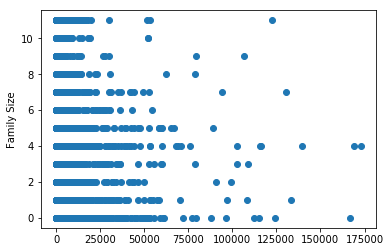

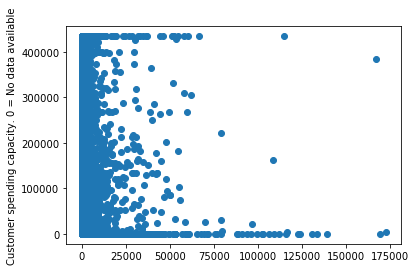

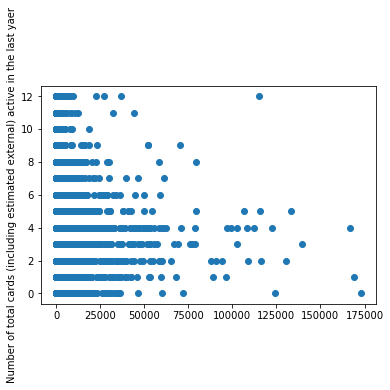

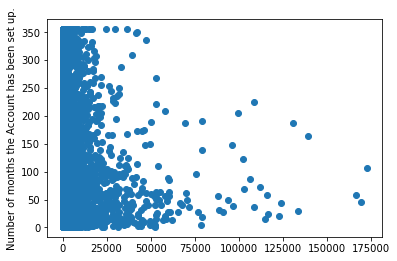

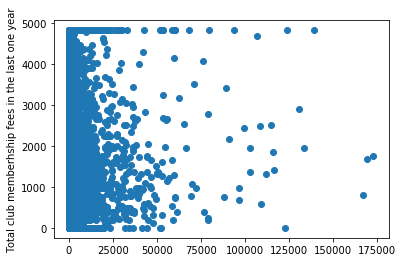

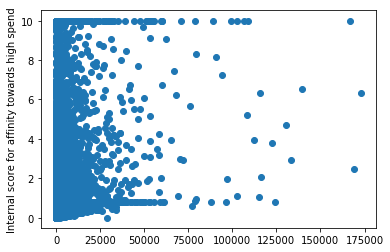

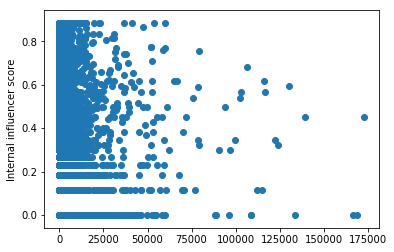

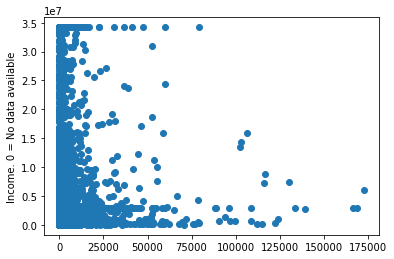

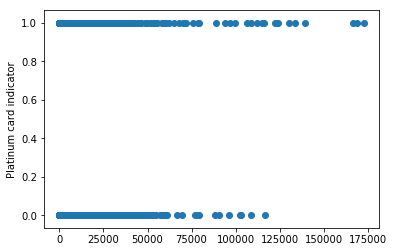

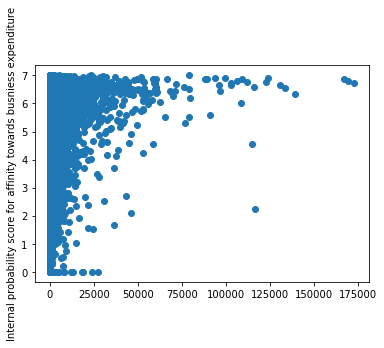

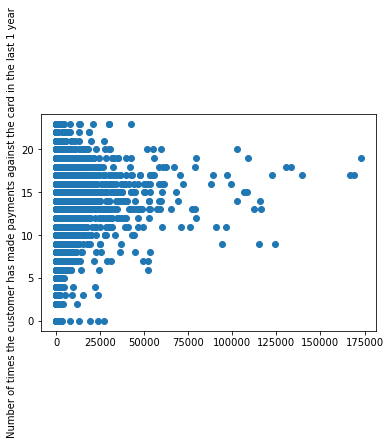

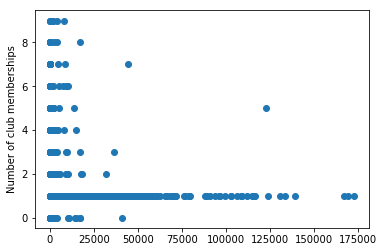

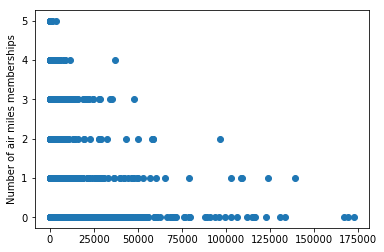

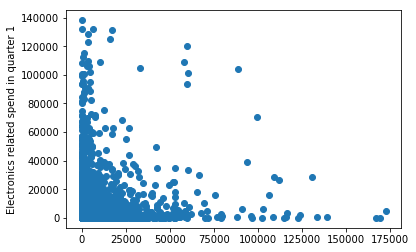

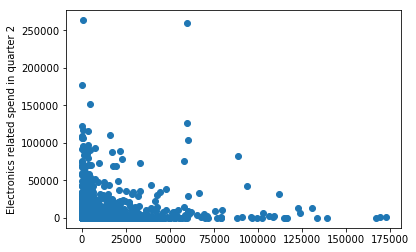

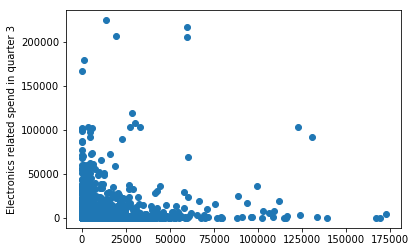

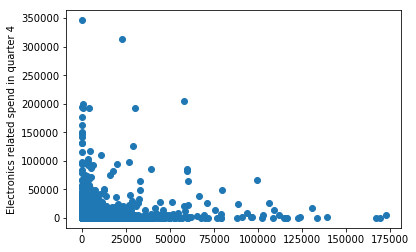

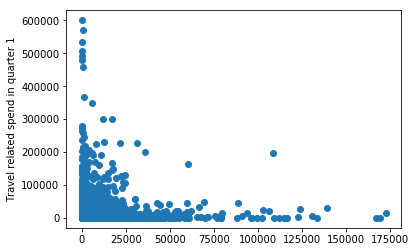

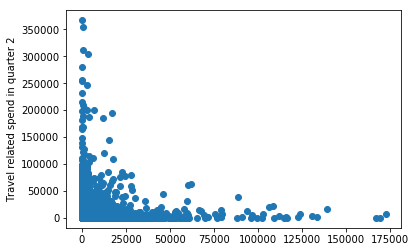

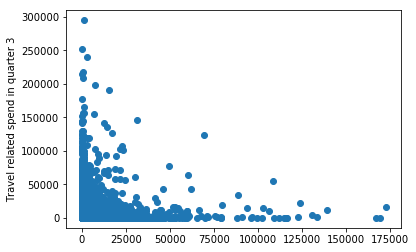

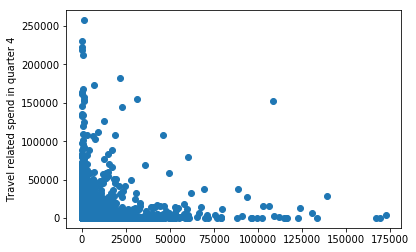

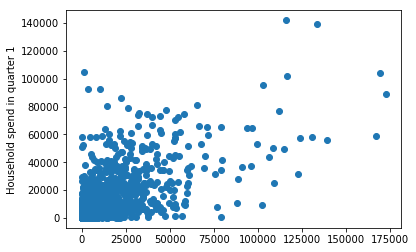

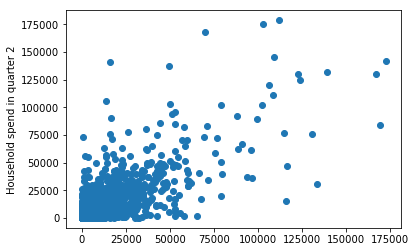

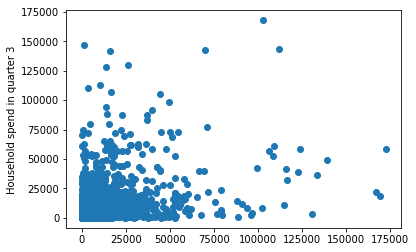

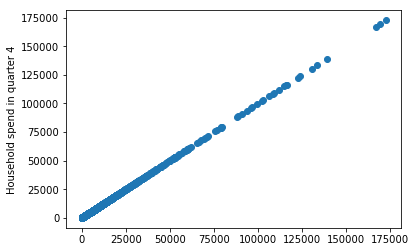

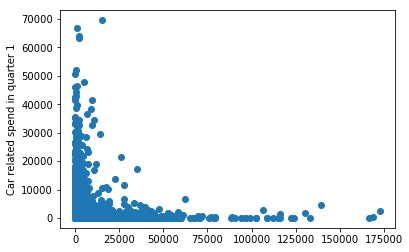

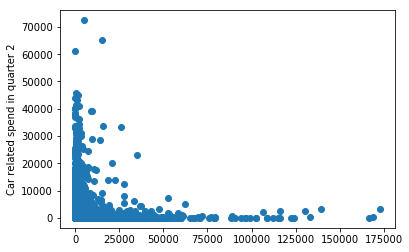

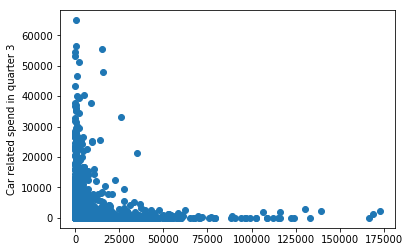

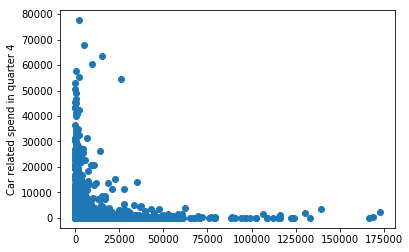

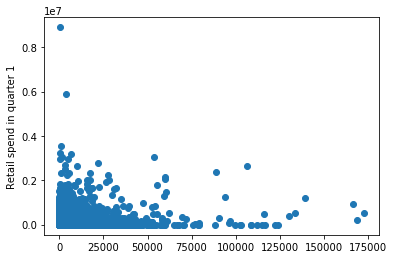

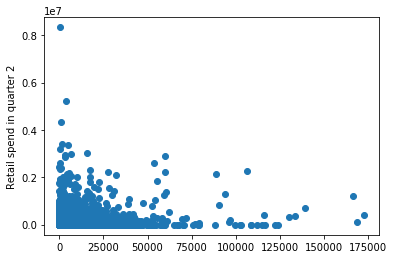

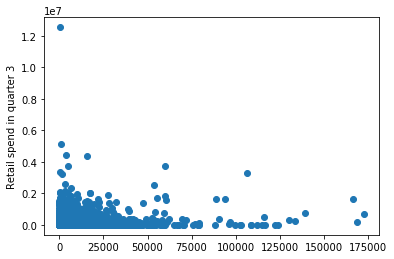

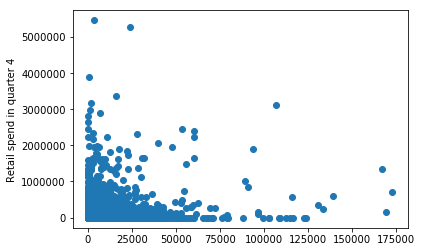

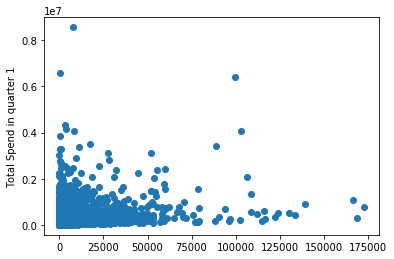

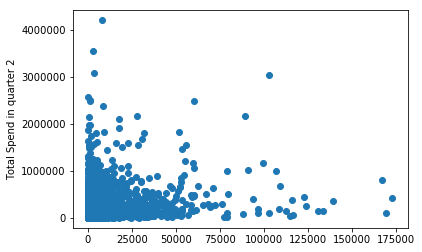

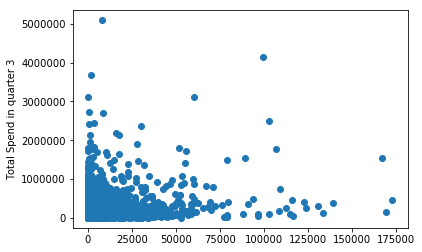

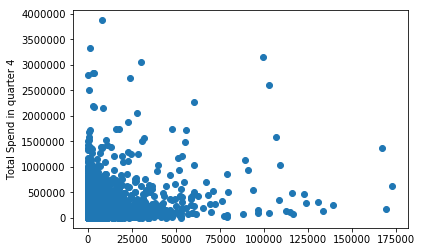

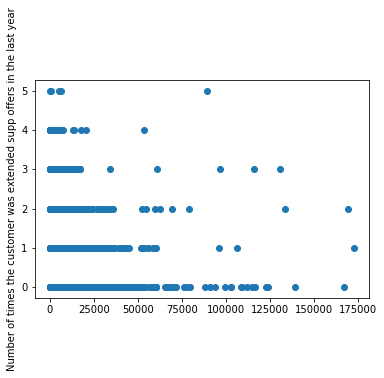

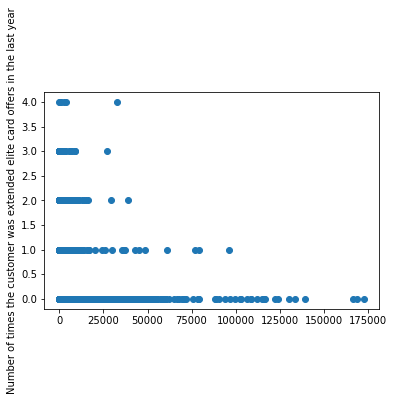

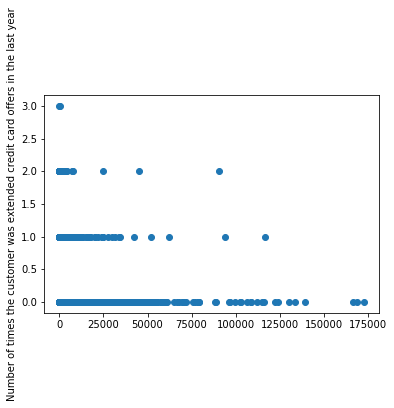

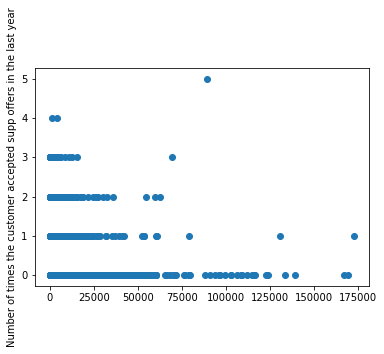

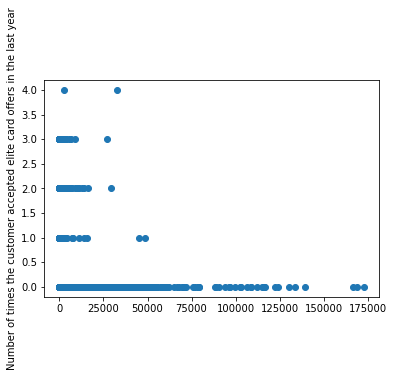

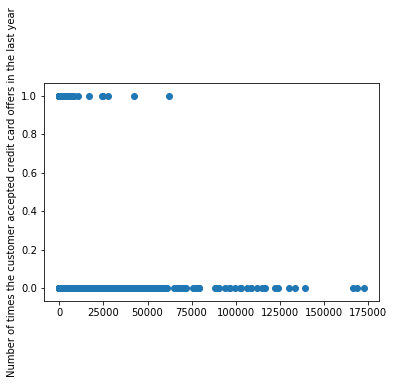

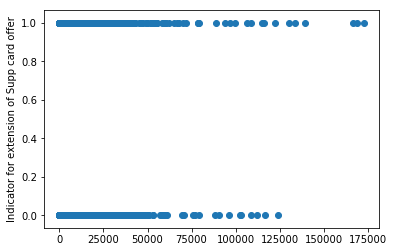

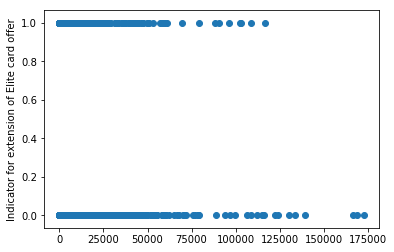

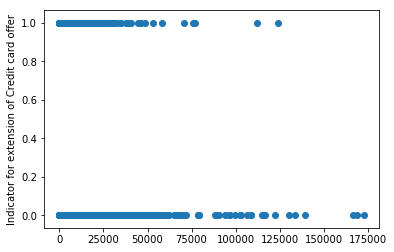

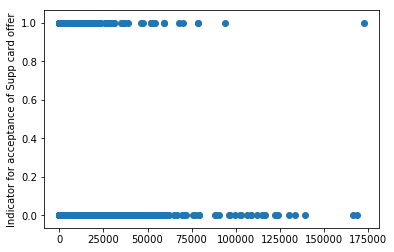

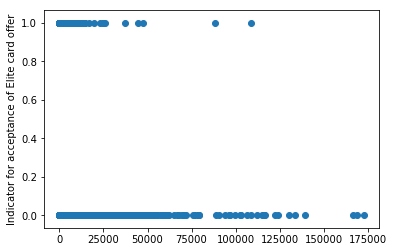

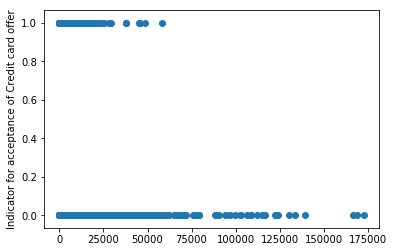

In [199]:
for i in features:
    plt.scatter(gameDfBaseOutlier.mvar27, gameDfBaseOutlier[dic[i]])
    #plt.xlabel('Car related spend in quarter 2')
    plt.ylabel(i)
    plt.show()

In [162]:
#before outier
print(gameDfBase.groupby('mvar49').size())
print(gameDfBase.groupby('mvar50').size())
print(gameDfBase.groupby('mvar51').size())

mvar49
0    36553
1     3447
dtype: int64
mvar50
0    37346
1     2654
dtype: int64
mvar51
0    37223
1     2777
dtype: int64


In [203]:
#after outlier
print(gameDfBaseOutlier.groupby('mvar49').size())
print(gameDfBaseOutlier.groupby('mvar50').size())
print(gameDfBaseOutlier.groupby('mvar51').size())

mvar49
0    36462
1     3420
dtype: int64
mvar50
0    37233
1     2649
dtype: int64
mvar51
0    37108
1     2774
dtype: int64


In [481]:
np.sum(gameDfBase.mvar3==0)

24354

In [113]:
gameDfBase[gameDfBase.mvar9!=0].mvar9.describe()

count    4.000000e+04
mean     2.038372e+06
std      3.824770e+06
min      6.000000e+01
25%      1.562172e+05
50%      9.187320e+05
75%      2.918974e+06
max      3.420702e+07
Name: mvar9, dtype: float64

In [482]:
from scipy.stats import pearsonr

In [515]:
f8=np.power(gameDfBaseOutlier.mvar8,5)
f2=gameDfBaseOutlier.mvar2
f6=gameDfBaseOutlier.mvar6
f7=gameDfBaseOutlier.mvar7

incomey=gameDfBaseOutlier.mvar9

In [516]:
pearsonr(incomey,f8)

(0.72374509733201542, 0.0)

In [499]:
from sklearn.linear_model import LinearRegression
gameDfBaseTemp2=gameDfBaseTemp
y=gameDfBaseTemp2.pop(dic['Income. 0 = No data available'])
x=gameDfBaseTemp2


KeyError: 'mvar9'

In [512]:
gameDfBaseTemp.shape

(38395, 50)

In [513]:
x=np.log(np.power(gameDfBaseTemp2.mvar8,5)+1)
x=x.values.reshape(-1,1)
lr=LinearRegression().fit( x,y)

In [542]:
y=(lr.predict(  ( ((gameDfBase.mvar8[gameDf.mvar9==0]**5)-(gameDfBase.mvar8[gameDf.mvar9==0]**5).mean())/(gameDfBase.mvar8[gameDf.mvar9==0]**5).std() ).values.reshape(-1,1)) )
y.shape

(1605,)

In [532]:
(gameDfBase.mvar8[gameDf.mvar9==0]**5).shape

(1605,)

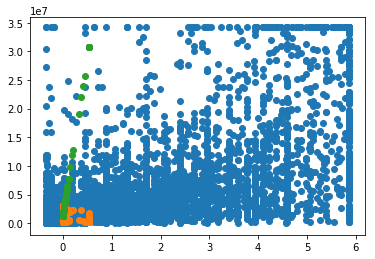

In [535]:
f8= np.log(f8+1)
plt.scatter( (f8-np.mean(f8))/np.std(f8) ,incomey)
plt.scatter(gameDfBase.mvar8[gameDf.mvar9==0]**5, gameDfBase.mvar9[gameDf.mvar9==0])
plt.scatter( (gameDfBase.mvar8[gameDf.mvar9==0]**5), y )
plt.show()

In [550]:
pearsonr((f8-np.mean(f8))/np.std(f8) ,(incomey-incomey.mean())/incomey.std())

(0.66042864187312089, 0.0)

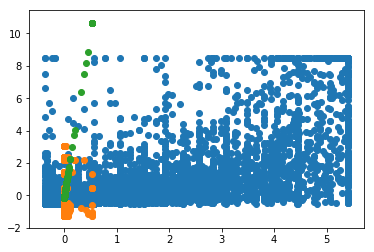

In [546]:
f8= np.log(f8+1)
plt.scatter( (f8-np.mean(f8))/np.std(f8) ,(incomey-incomey.mean())/incomey.std() )
plt.scatter(gameDfBase.mvar8[gameDf.mvar9==0]**5, (gameDfBase.mvar9[gameDf.mvar9==0]-gameDfBase.mvar9[gameDf.mvar9==0].mean())/(gameDfBase.mvar9[gameDf.mvar9==0].std() ) )
plt.scatter( (gameDfBase.mvar8[gameDf.mvar9==0]**5), (y-y.mean())/y.std() )
plt.show()

In [287]:
pearsonr(gameDfBaseTemp.mvar9, gameDfBaseTemp.mvar8)

(0.38511739243558396, 0.0)

In [488]:
gameDf=pd.DataFrame(pd.read_csv('Training_Dataset.csv'))

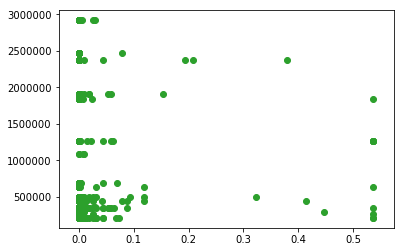

In [496]:
plt.scatter(gameDfBase.mvar8[gameDf.mvar9==0]**5, gameDfBase.mvar9[gameDf.mvar9==0])
plt.show()

In [494]:
(gameDfBase.mvar9[gameDf.mvar9==0]).shape

(1605,)

In [490]:
np.sum(gameDf.mvar9!=0)

38395

In [493]:
gameDfBase.shape

(40000, 51)

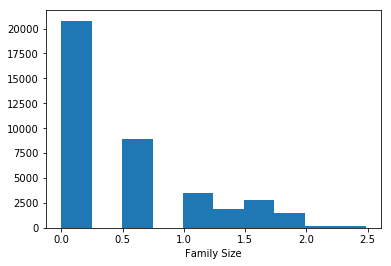

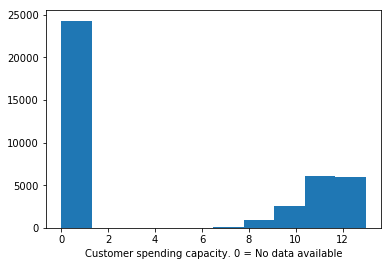

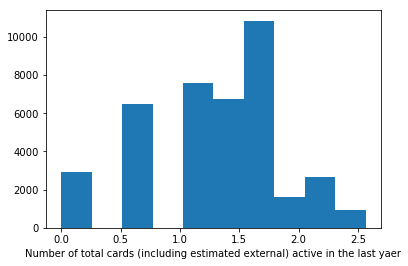

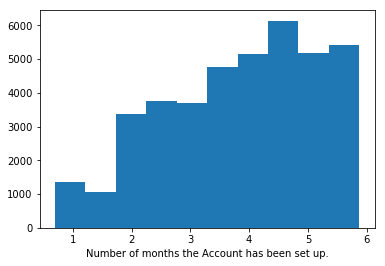

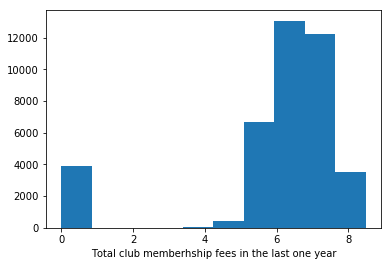

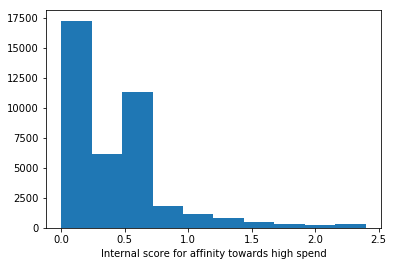

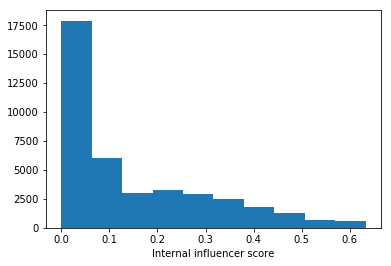

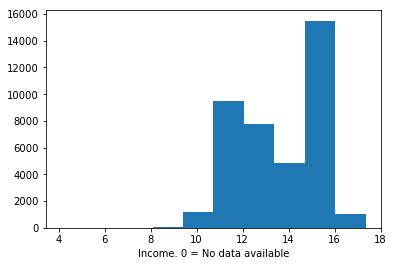

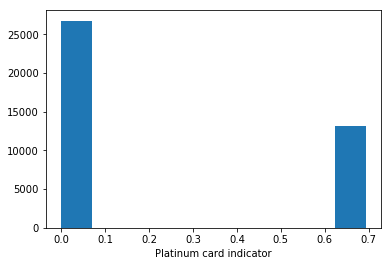

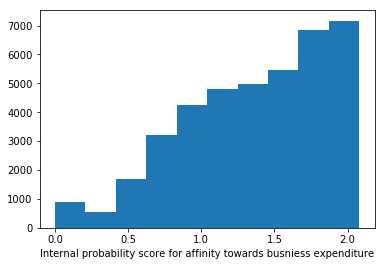

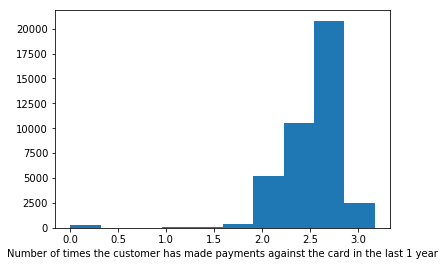

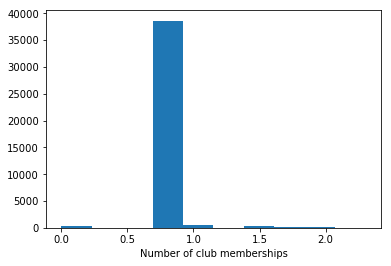

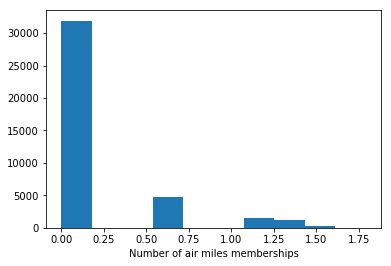

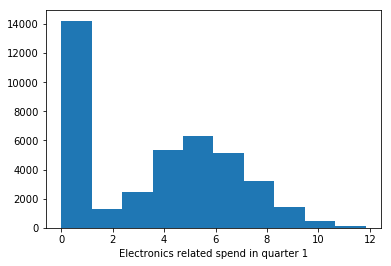

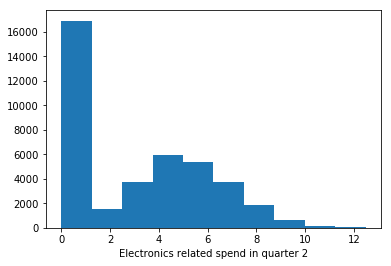

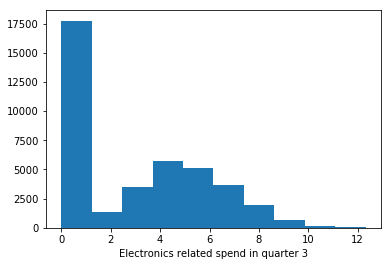

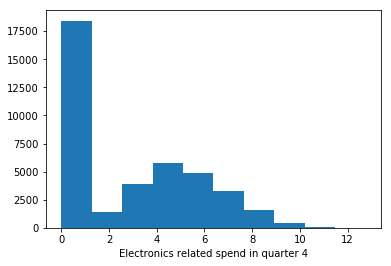

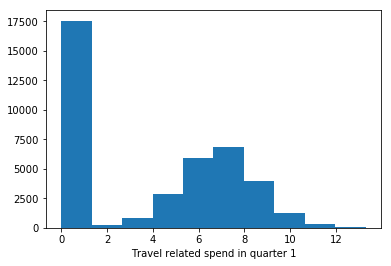

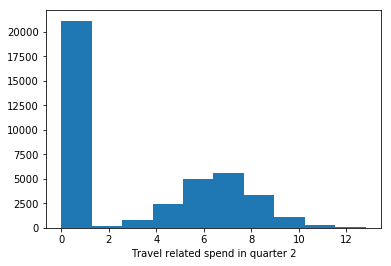

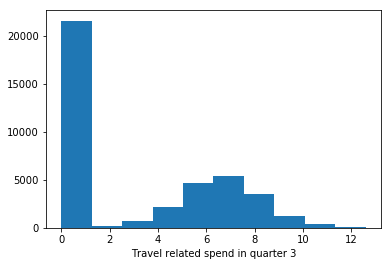

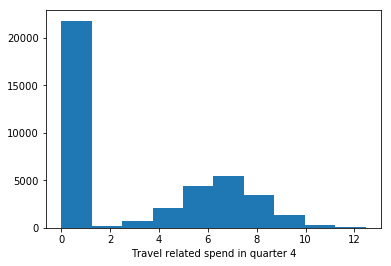

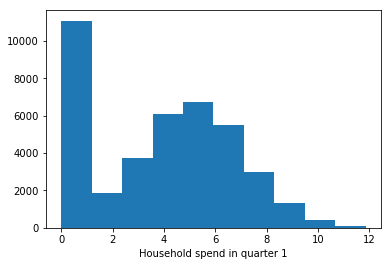

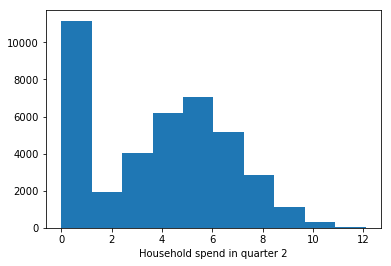

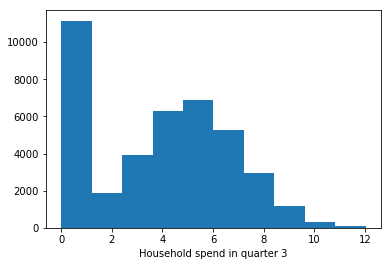

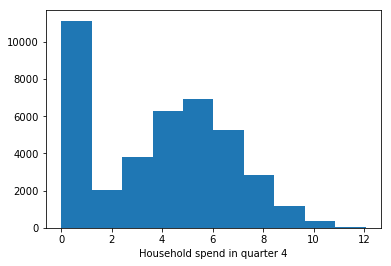

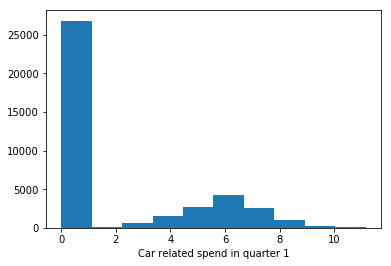

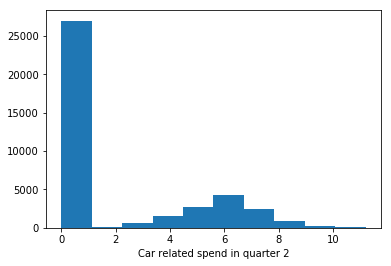

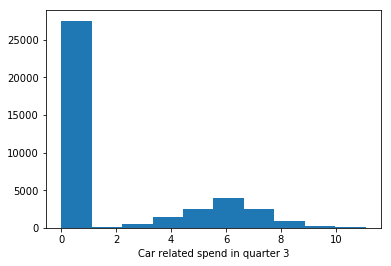

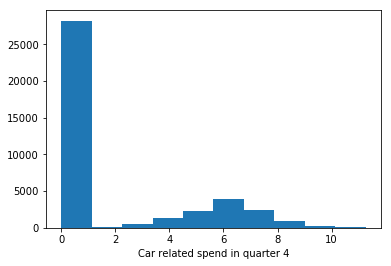

/home/ekka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: max must be larger than min in range parameter.

In [283]:
#tranformation
for i in features:
    plt.hist(np.log(gameDfBaseOutlier[dic[i]]+1))
    plt.xlabel(i)
    plt.show()

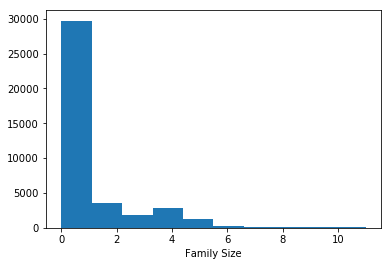

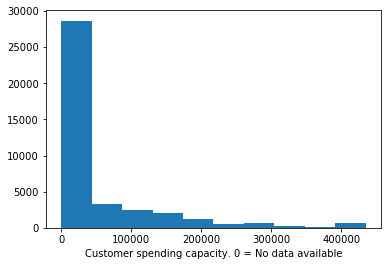

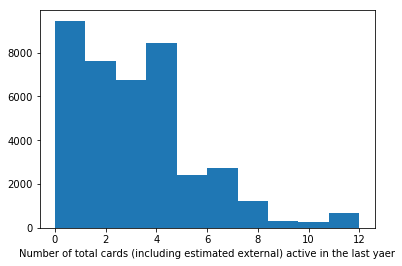

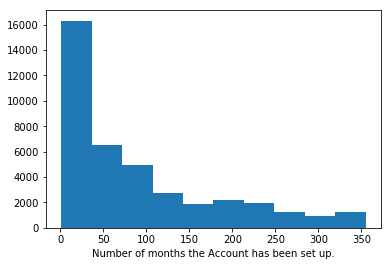

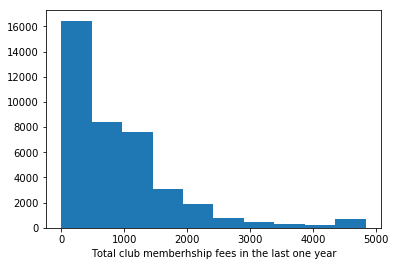

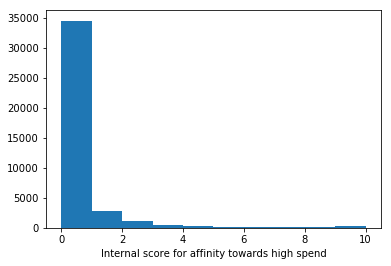

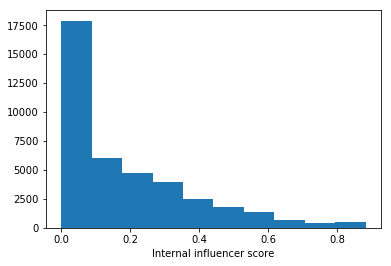

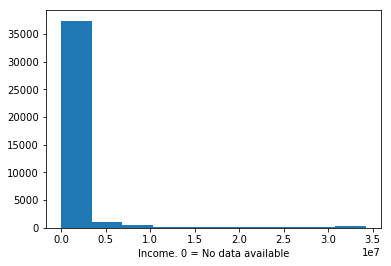

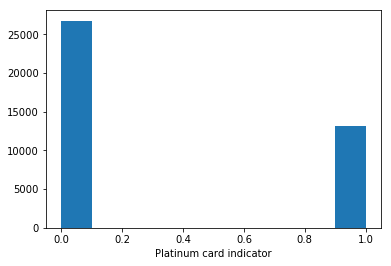

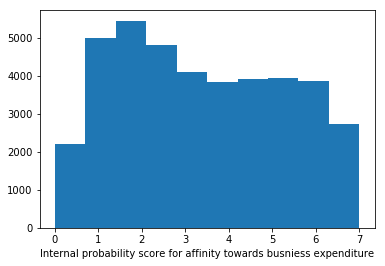

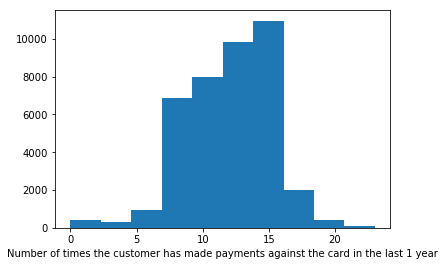

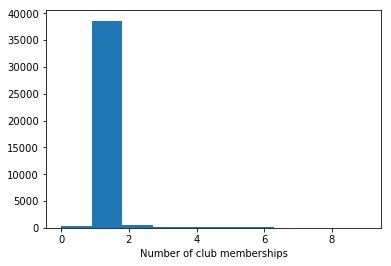

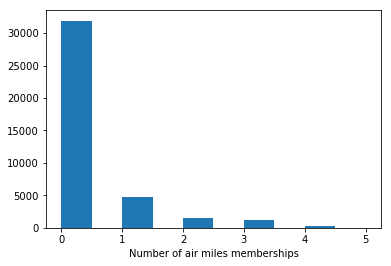

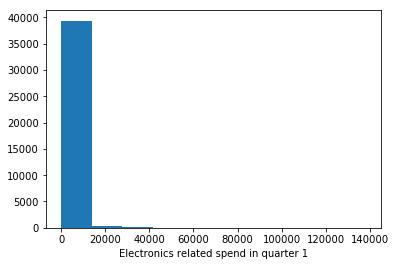

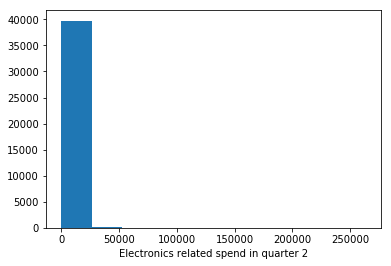

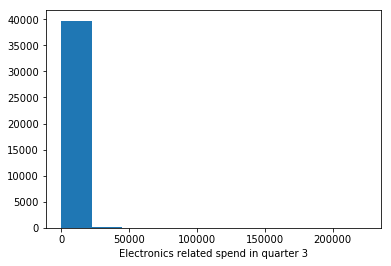

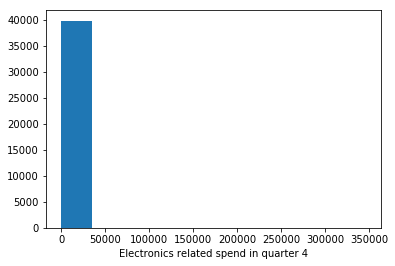

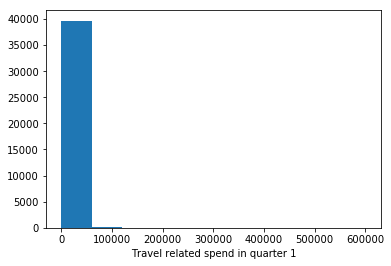

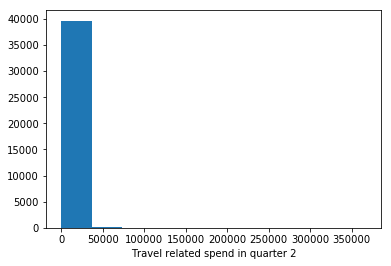

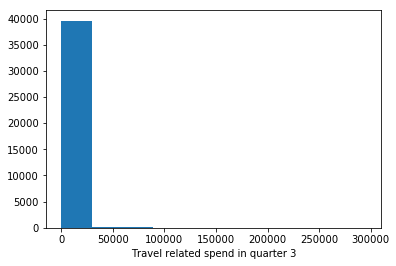

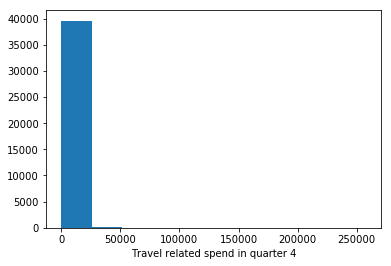

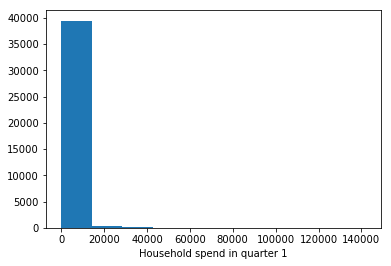

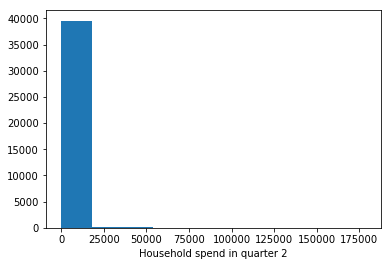

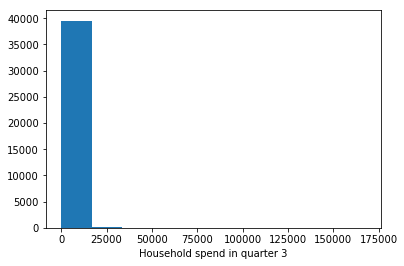

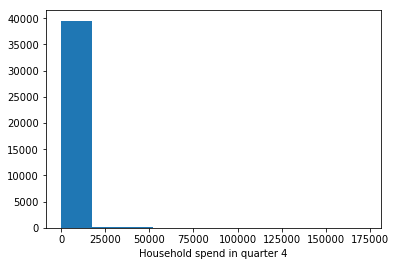

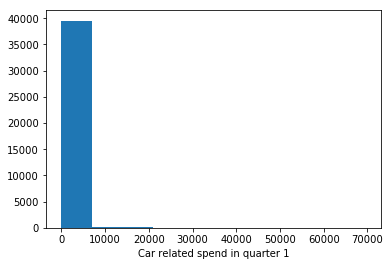

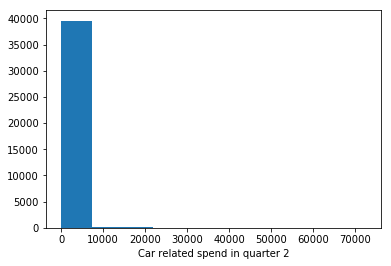

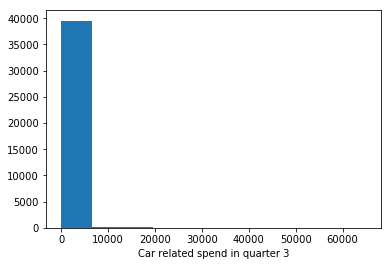

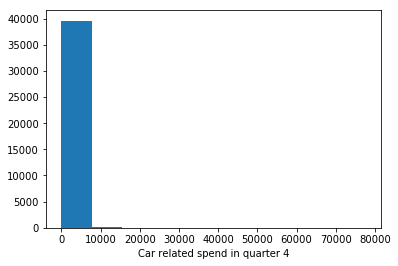

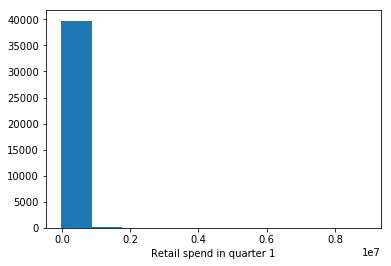

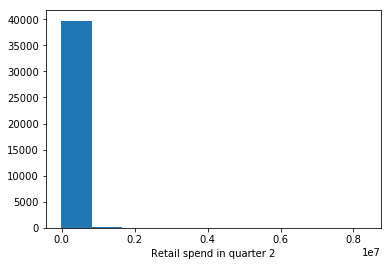

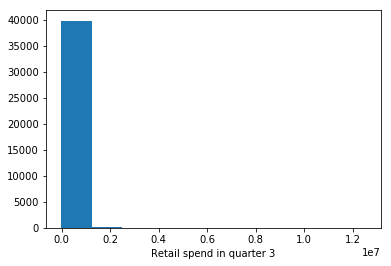

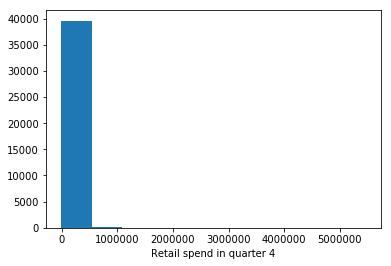

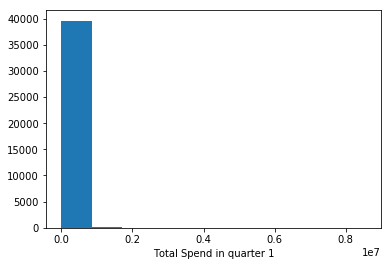

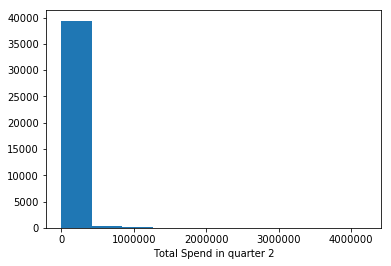

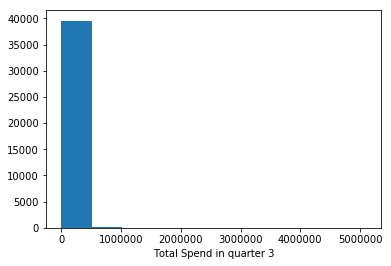

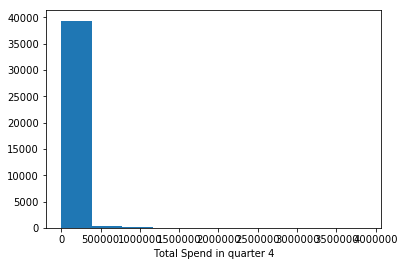

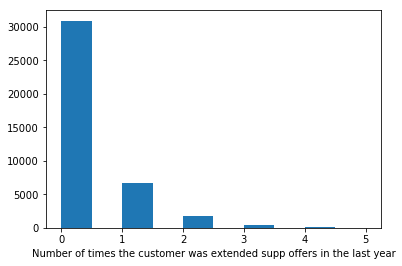

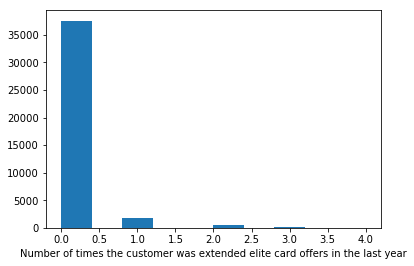

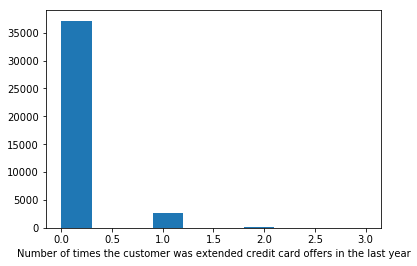

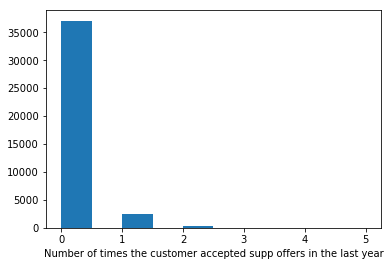

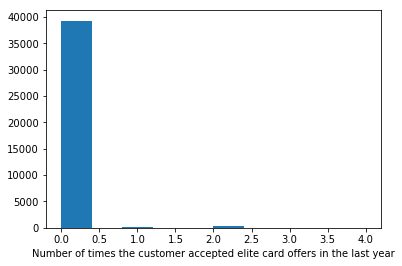

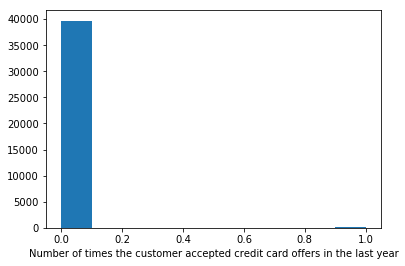

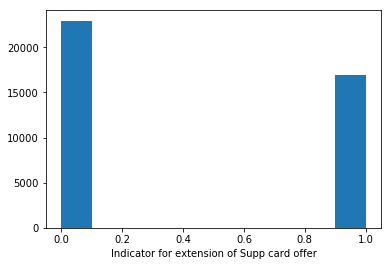

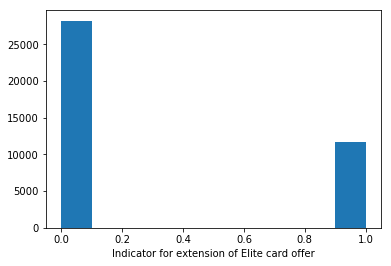

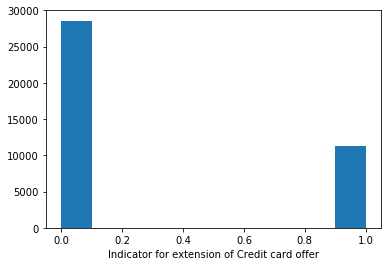

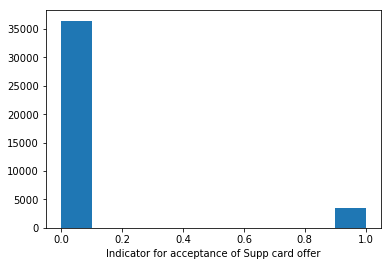

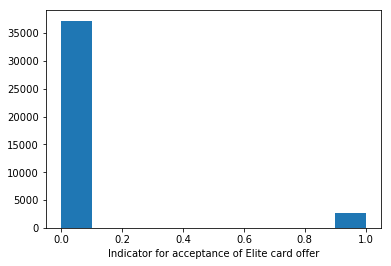

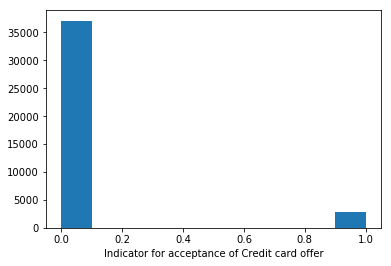

In [282]:
#tranformation
for i in features:
    plt.hist((gameDfBaseOutlier[dic[i]]))
    plt.xlabel(i)
    plt.show()

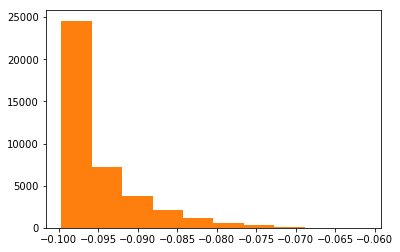

In [284]:
plt.hist( -1/np.log(gameDfBaseOutlier[dic['Retail spend in quarter 3']]+np.mean(gameDf[dic['Retail spend in quarter 3']])) ) 
plt.show()

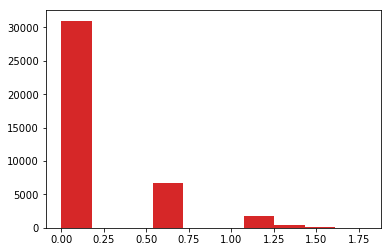

In [281]:
plt.hist(np.log(gameDfBase.mvar40+1))
plt.show()

In [551]:
gameDfBase.shape

(40000, 51)